In [1]:
import random

import leverage_effect as leveff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import real_data_loader
import torch
import train_garch

## Set seeds for reconstruction of the results

In [2]:
# Set seeds.
SEED = 12345
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

#### Load Data

Filter out selected times and stocks

In [3]:
real_loader = real_data_loader.RealDataLoader(cache="../data/cache")
real_data = real_loader.get_timeseries(
    col_name="Adj Close", data_path="../data/raw_yahoo_data", update_all=False
)

Cached data found at ../data/cache/time_series_Adj_Close.csv.


Inspect data for missing information

In [4]:
N_STOCKS = 9216
nan_mask = ~np.isnan(real_data)  # returns pd.dataframe
num_non_nans: pd.DataFrame = np.sum(nan_mask, axis=0)
non_nan_orderd_stocks: pd.DataFrame = num_non_nans.sort_values(ascending=False)
# plt.plot(non_nan_orderd_stocks.values)
stocks = non_nan_orderd_stocks.iloc[non_nan_orderd_stocks.values >= N_STOCKS].index

In [5]:
# stocks = ["MSFT", "AAPL", "IBM", "ADBE", "ORCL", "INTC", "AMD", "HPQ"]
# stocks = ['MSFT']
first_date = real_data.index[-N_STOCKS]
real_data = real_data.loc[first_date:, stocks]
real_data = real_data.loc[:, np.all(~np.isnan(real_data), axis=0)]
assert np.all(~np.isnan(real_data))
print(f"Shape: {real_data.shape}")
print(f"Frist Date {real_data.index[0]:%Y-%m-%d}")
print(f"Last Date {real_data.index[-1]:%Y-%m-%d}")

Shape: (9216, 233)
Frist Date 1987-08-05
Last Date 2024-03-01


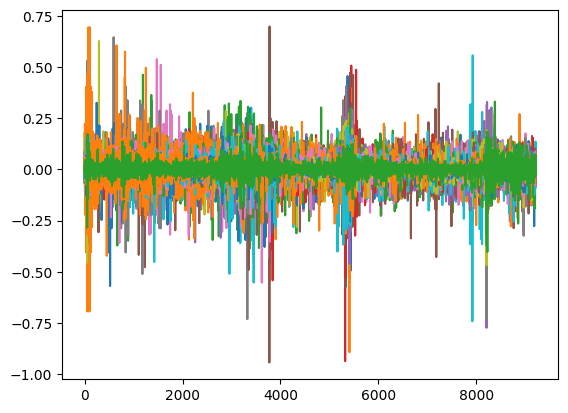

In [6]:
np_data = np.array(real_data)
np_ret = np.log(np_data[1:] / np_data[:-1])
np_ret[np.abs(np_ret) >= 2] = 0  # clean data
np_log_price = np.cumsum(np_ret, axis=0)
plt.plot(np_ret)
plt.show()

Real Data leverage effect beta -0.6751522558367845
Real Data leverage effect beta_std 0.18478433585766973
Real Data leverage effect corr 0.7477986784747183
Real Data leverage effect corr_std 0.15084486290810695
Real Data leverage effect corr_max 0.7268756321311232
Real Data leverage effect corr_min 0.02056704606324777
Real Data leverage effect beta_min -0.9643298289623893
Real Data leverage effect beta_max 0.1194477141495297


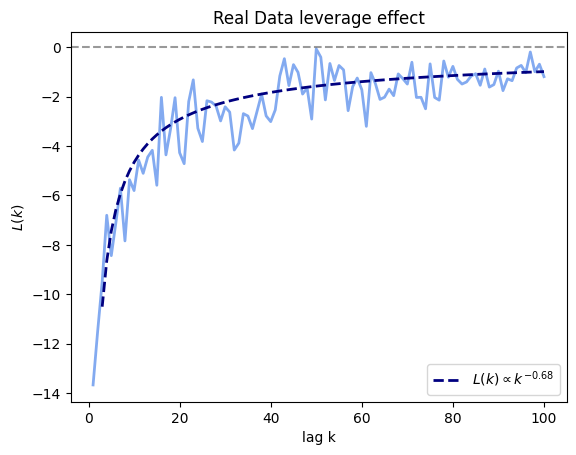

In [7]:
stats = [
    "beta",
    "beta_std",
    "corr",
    "corr_std",
    "corr_max",
    "corr_min",
    "beta_min",
    "beta_max",
]
leveff.visualize_stat(plt.gca(), np_ret, "Real Data", stats)
# plt.savefig("/home/nico/edu/masterthesis/presentations/week16/figures/le.png")
plt.show()
plt.close()

## Garch Normal, p=3, q=3

In [8]:
cache = "../data/cache/Garch_normal_3_3_2024_06_26-11_11_24"
garch_log_rets = train_garch.sample_garch(cache)

# Drop bad fits
garch_log_rets = garch_log_rets[:, np.sum(np.isnan(garch_log_rets), axis=0) == 0]

/home/nico/edu/masterthesis/code/src/garch/train_garch.py:131: RuntimeWarning: invalid value encountered in log
  log_returns.append(np.log(return_simulation))


GARCH leverage effect beta -0.4564986896271743
GARCH leverage effect beta_std 0.2135288707060671
GARCH leverage effect corr 0.5003291519108883
GARCH leverage effect corr_std 0.115017163184733
GARCH leverage effect corr_max 0.6244835304156452
GARCH leverage effect corr_min 0.0011601370476046
GARCH leverage effect beta_min -0.8114182837069112
GARCH leverage effect beta_max 0.8784339637994851


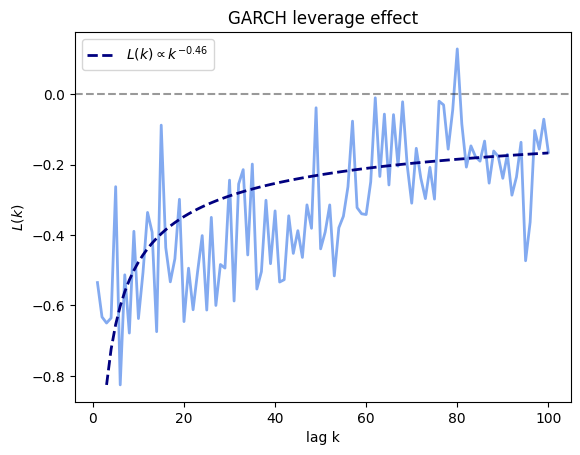

In [10]:
stats = [
    "beta",
    "beta_std",
    "corr",
    "corr_std",
    "corr_max",
    "corr_min",
    "beta_min",
    "beta_max",
]
leveff.visualize_stat(plt.gca(), garch_log_rets, "GARCH", stats)
# plt.savefig("/home/nico/edu/masterthesis/presentations/week16/figures/le.png")
plt.show()
plt.close()